# Heart Attack Prediction


### Import and Load Data

In [22]:

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Load dataset diunduh dari `https://www.kaggle.com/datasets/thxogg/heart-attack-classification-training-dataset/data`

In [23]:
dataset_path = "datasets/heart_attack_dataset.csv"
heart_attack_dataset = pd.read_csv(dataset_path)
heart_attack_dataset

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,62,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,96,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


### Deskripsi kolom dataset

Dataset ini berisi 1.319 sampel dengan sembilan kolom: delapan variabel input dan satu variabel output.

Variabel Input:

1. Usia (age)

2. Jenis Kelamin (gender): 0 untuk perempuan, 1 untuk laki-laki

3. Detak Jantung (impluse)

4. Tekanan Darah Sistolik (pressurehight)

5. Tekanan Darah Diastolik (pressurelow)

6. Gula Darah (glucose)

7. CK-MB (kcm) : Jika CK-MB meningkat dan rasio CK-MB terhadap total CK (indeks relatif) lebih dari 2,5-3, maka kemungkinan jantung mengalami kerusakan.

8. Test-Troponin (troponin)

Variabel Output:

9. Class Menunjukkan ada atau tidaknya serangan jantung, dengan kategori:
Negatif, yaitu Tidak ada serangan jantung dan Positif, yaitu Serangan jantung



## EDA

### Data Cleaning

In [24]:
# Mengecek informasi dataset
heart_attack_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


kolom `gender` dan `class` adalah tipe data kategori, sedangkan kolom lainnya adalah tipe data numerik.

In [25]:
# Mengecek statistik deskriptif dataset
heart_attack_dataset.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.190296,0.659591,78.338135,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.646558,0.474027,51.630760,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


Dari statistik deskripsi tersebut, terlihat bahwa nilai maksimum dari kolom `impluse` (detak jantung) adalah 1111 yang mana jauh dari kondisi normal. Bahkan untuk detak jantung di atas 300 saja sudah dianggap kondisi serius, sehingga tidak mungkin seseorang mengalami kondisi tersebut. 

Sebelum mengambil keputusan, dilakukan pengecekan mana saja `impluse` yang memiliki nilai lebih dari 300.

In [26]:
heart_attack_dataset[heart_attack_dataset['impluse']>=300]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
63,45,1,1111,141,95,109.0,1.33,1.010,positive
717,70,0,1111,141,95,138.0,3.87,0.028,positive
1069,32,0,1111,141,95,82.0,2.66,0.008,negative


Dari hasil tersebut, diduga terjadi kesalahan penulisan karena hanya nilai 1111 yang lebih dari 300. Oleh karena itu, baris yang memiliki nilai `impluse` __1111__ diubah menjadi __111__. 

In [27]:
heart_attack_dataset.loc[heart_attack_dataset['impluse'] == 1111, 'impluse'] = 111
heart_attack_dataset.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.190296,0.659591,76.063685,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.646558,0.474027,15.352328,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,135.000000,223.000000,154.000000,541.000000,300.000000,10.300000


### Univariate Analysis

__Fitur Kategori__

        jumlah sampel  persentase
gender                           
1                 870        66.0
0                 449        34.0


<Axes: title={'center': 'gender'}, xlabel='gender'>

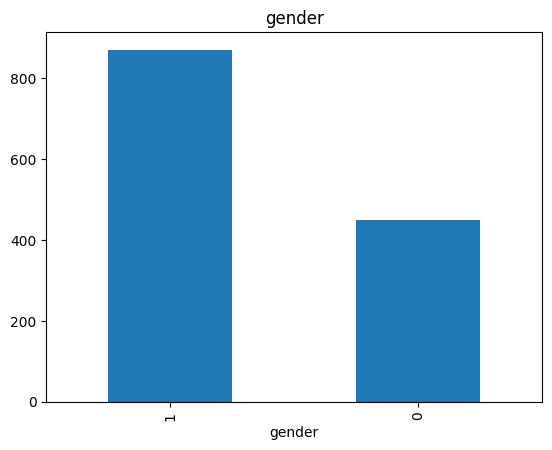

In [28]:
# Fitur gender
feature = 'gender'
count = heart_attack_dataset[feature].value_counts()
percent = 100*heart_attack_dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Demografi sampel didominasi oleh laki-laki sebanyak 66%

          jumlah sampel  persentase
class                              
positive            810        61.4
negative            509        38.6


<Axes: title={'center': 'class'}, xlabel='class'>

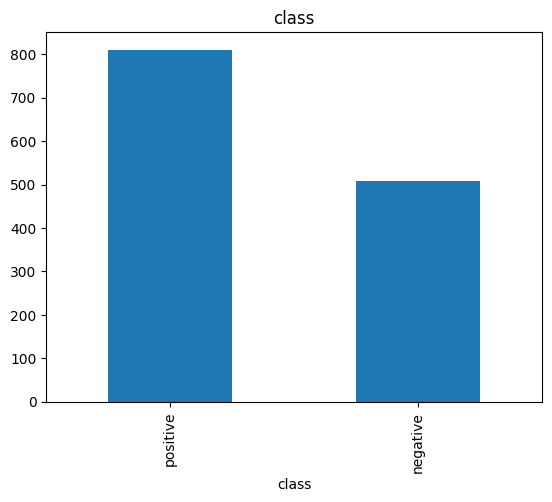

In [29]:
# Output Class
output = 'class'
count = heart_attack_dataset[output].value_counts()
percent = 100*heart_attack_dataset[output].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=output)

Distribusi data tidak merata, data terbanyak adalah data positif penyakit jantung, yang mana ini dapat mempengaruhi model.

## Multivariate Analysis

Dilakukan Encoding untuk kolom `class` di mana nilai positive akan diubah menjadi 1 dan negative menjadi 0.

In [40]:
heart_attack_dataset.loc[heart_attack_dataset['class'] == 'positive', 'class'] = 1
heart_attack_dataset.loc[heart_attack_dataset['class'] == 'negative', 'class'] = 0
heart_attack_dataset['class'] = heart_attack_dataset['class'].astype(int)
heart_attack_dataset.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,62,1,66,160,83,160.0,1.80,0.012,0
1,21,1,96,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


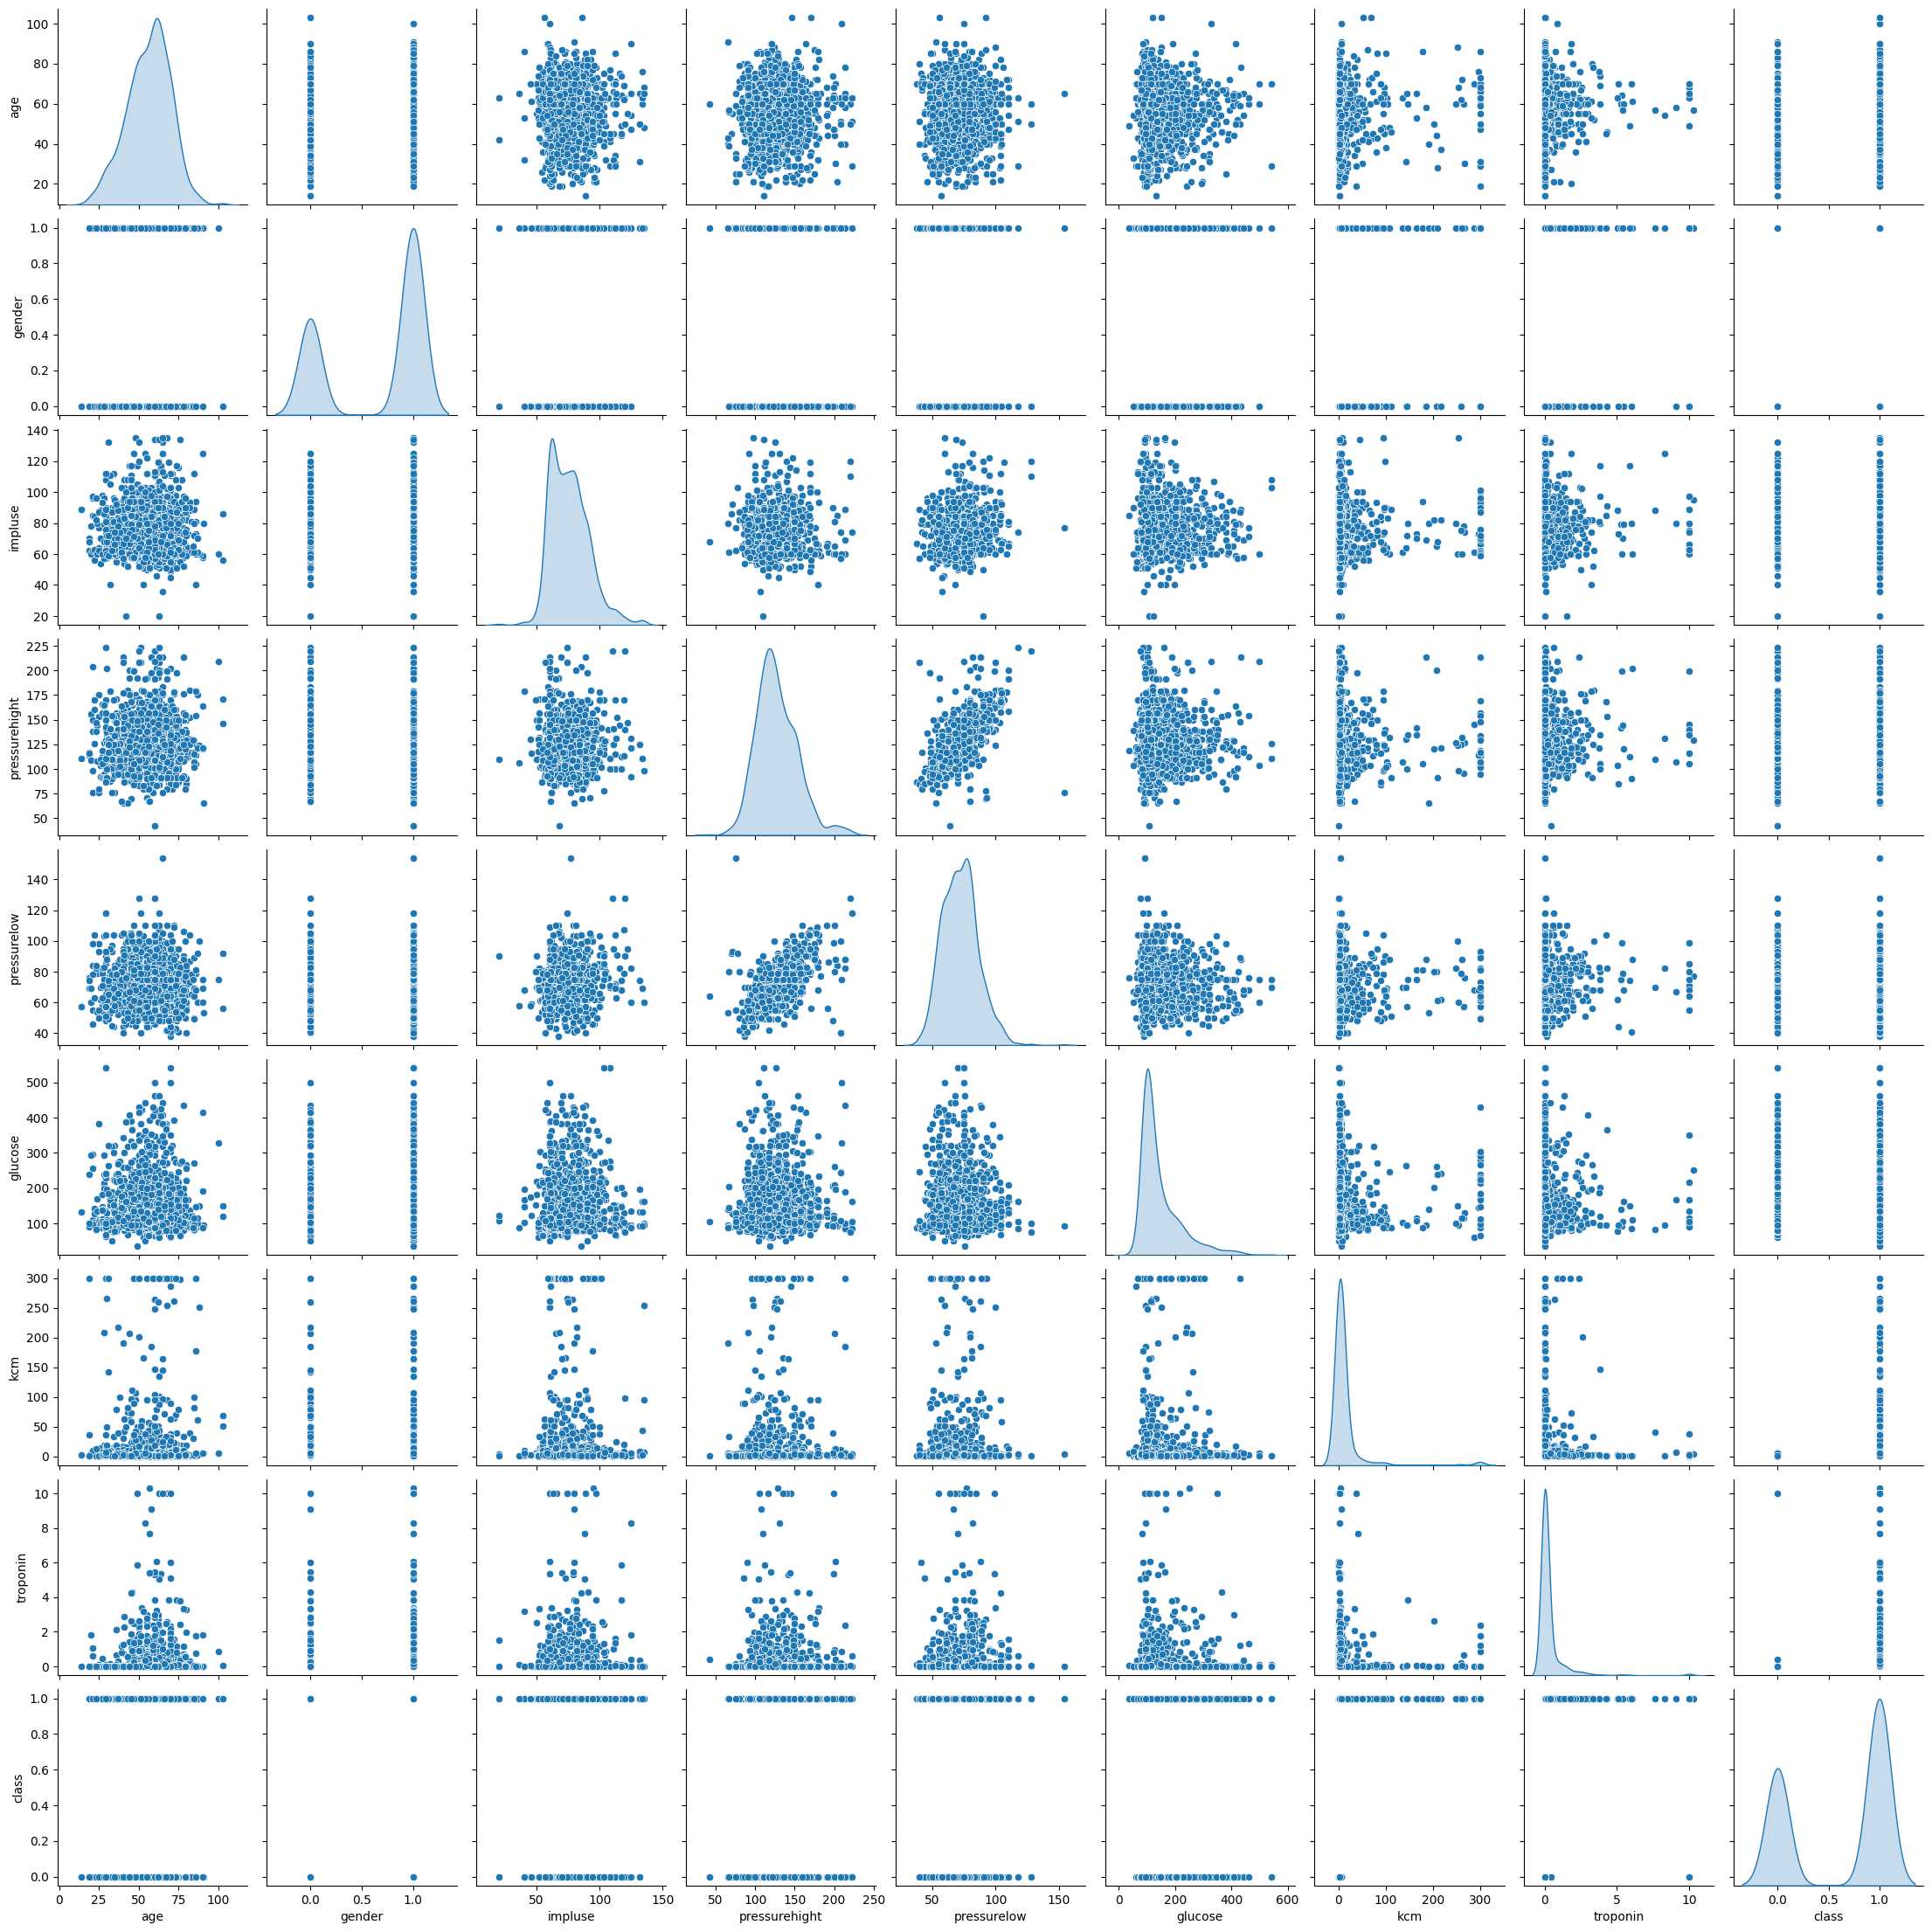

In [41]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(heart_attack_dataset, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix Hearth Attack Dataset')

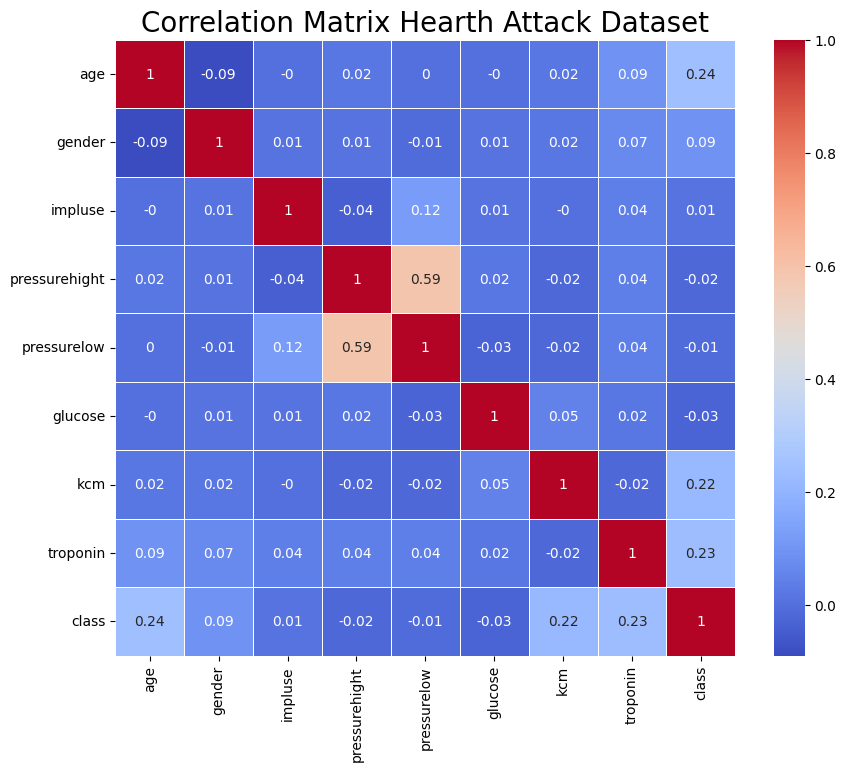

In [42]:
plt.figure(figsize=(10, 8))
correlation_matrix = heart_attack_dataset.corr().round(2)

# Untuk menampilkan nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,)
plt.title("Correlation Matrix Hearth Attack Dataset", size=20)

Pada matriks korelasi, dapat dilihat bahwa fitur `age`, `kcm` dan `triponin` adalah fitur yang berkolerasi paling tinggi.  

## Train-Test Split

Digunakan proporsi pembagian sebesar 70:30 dengan fungsi `train_test_split` dari sklearn.

In [50]:
from sklearn.model_selection import train_test_split

FEATURE_X = heart_attack_dataset.drop(["class"],axis =1)
destined_y = heart_attack_dataset["class"]
X_train, X_test, y_train, y_test = train_test_split(FEATURE_X, destined_y, test_size = 0.3, random_state = 177)

In [51]:
print(f'Total # of sample in whole dataset: {len(FEATURE_X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1319
Total # of sample in train dataset: 923
Total # of sample in test dataset: 396


## Train Model

In [60]:
# Dataframe untuk analisis model
models = pd.DataFrame(index=['train_acc', 'test_acc'], 
                      columns=['RandomForest'])

In [61]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
 
 
# buat model prediksi
RF = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_acc','RandomForest'] = accuracy_score(y_pred=RF.predict(X_train), y_true=y_train)     

In [62]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
acc = pd.DataFrame(columns=['train', 'test'], index=['RF'])

 
# Hitung accuracy masing-masing algoritma pada data train dan test

acc.loc['RF', 'train'] = accuracy_score(y_true=y_train, y_pred=RF.predict(X_train))
acc.loc['RF', 'test'] = accuracy_score(y_true=y_test, y_pred=RF.predict(X_test))
 
# Tampilkan mse
acc

,train,test
RF,1.0,0.984848


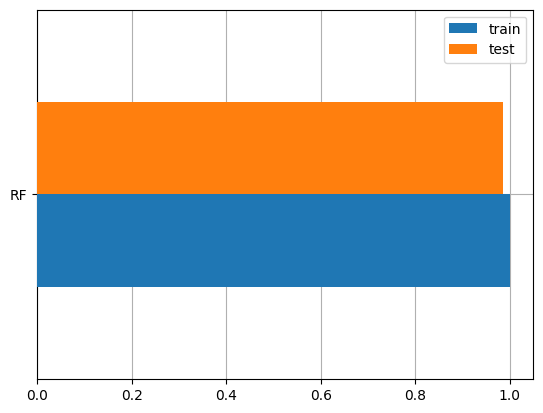

In [63]:
# Plot metrik
fig, ax = plt.subplots()
acc.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [64]:
# Prediksi menggunakan beberapa harga dari data test

prediksi = X_test.iloc[130:150].copy()
pred_dict = {'y_true':y_test[130:150]}
pred_dict['prediksi_'+'Random Forest'] = RF.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_Random Forest
27,0,0
235,1,1
1290,1,1
1152,0,0
444,1,1
935,1,1
934,1,1
1302,0,0
963,1,1
1291,1,1
